In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

IMAGES_PATH='.'

def save_fig(fig_id, tight_layout=False, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure neural_2


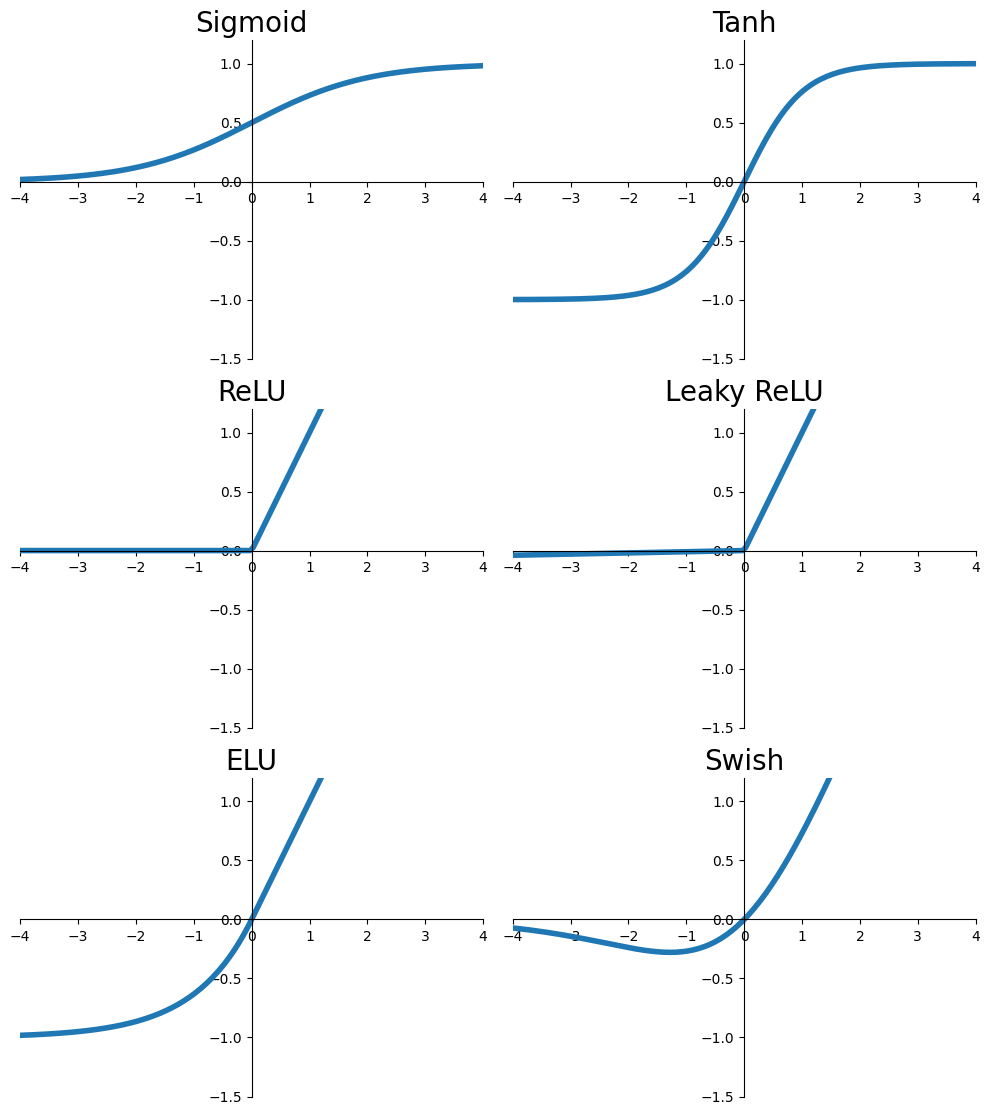

In [2]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

# Activation function names and definitions
activation_functions = [
    (sigmoid, "Sigmoid\nf(x) = 1 / (1 + exp(-x))"),
    (tanh, "Tanh\nf(x) = tanh(x)"),
    (relu, "ReLU\nf(x) = max(0, x)"),
    (leaky_relu, "Leaky ReLU\nf(x) = x if x>=0; αx if x<0"),
    (elu, "ELU\nf(x) = x if x>=0; α(exp(x)-1) if x<0"),
    (swish, "Swish\nf(x) = x * sigmoid(x)")
]

activation_functions = [
    (sigmoid, "Sigmoid"),
    (tanh, "Tanh"),
    (relu, "ReLU"),
    (leaky_relu, "Leaky ReLU"),
    (elu, "ELU"),
    (swish, "Swish")
]

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Plot each activation function
for idx, (func, definition) in enumerate(activation_functions):
    row = idx // 2
    col = idx % 2
    x = np.linspace(-5, 5, 200)
    y = func(x)
    
    ax = axes[row, col]
    ax.set_title(definition, fontsize=20)  # Larger titles
    ax.grid(False)  # Turn off the grid
    ax.set_xlim([-4, 4])
    ax.set_ylim([-1.5, 1.2])
    
    # Display main axes
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.plot(x, y, linewidth=4)  # Thicker lines

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin for the suptitle
save_fig('neural_2')
plt.show()


Saving figure neural_3


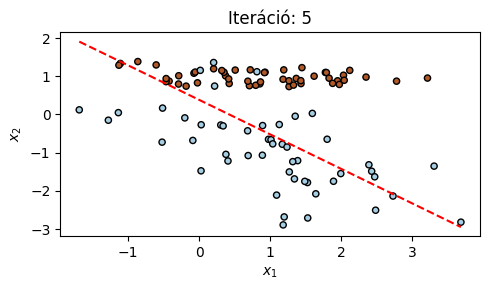

Saving figure neural_4


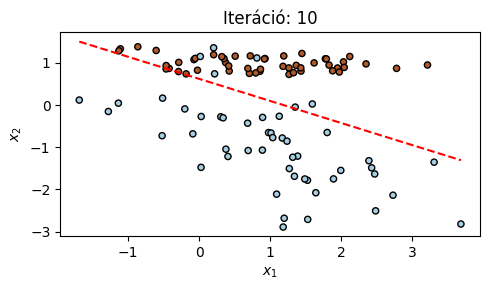

Saving figure neural_5


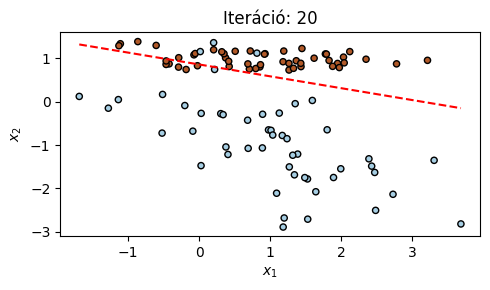

Saving figure neural_6


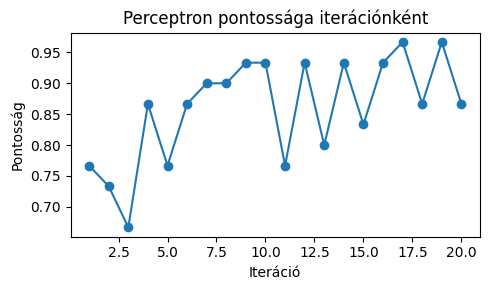

In [3]:
rs = 0
# Generate a simple dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=rs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

# Define the perceptron model
model = Perceptron(max_iter=1, tol=None, random_state=rs)  # max_iter=1 for manual epoch control

# Number of epochs for training
epochs = 20

# Function to plot decision boundary
def plot_decision_boundary(model, epoch, ax, id):
    coef = model.coef_[0]
    intercept = model.intercept_
    x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    y_boundary = -(coef[0] / coef[1]) * x_boundary - intercept / coef[1]

    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired', edgecolor='k', s=20)
    plt.plot(x_boundary, y_boundary, 'r--')
    plt.title(f'Iteráció: {epoch}')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.tight_layout()
    save_fig(f'neural_{id}')
    plt.show()


selected_epochs = [0, 5, 10, 20]
# Initialize a list to store accuracy values
accuracy_per_epoch = []
start_id = 3

# Train the model and plot decision boundary for selected epochs
for epoch in range(1, epochs + 1):
    model.partial_fit(X_train, y_train, classes=np.unique(y))  # Train for one epoch
    # Calculate and store the accuracy after each epoch
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_epoch.append(accuracy)
    # Plot the decision boundary at selected epochs
    if epoch in selected_epochs:
        plot_decision_boundary(model, epoch, None, start_id)
        start_id +=1

# Plot the accuracy graph
plt.figure(figsize=(5, 3))
plt.plot(range(1, epochs + 1), accuracy_per_epoch, marker='o', linestyle='-')
plt.title('Perceptron pontossága iterációnként')
plt.xlabel('Iteráció')
plt.ylabel('Pontosság')
plt.tight_layout()
save_fig(f'neural_{start_id}')
plt.show()



Saving figure neural_7


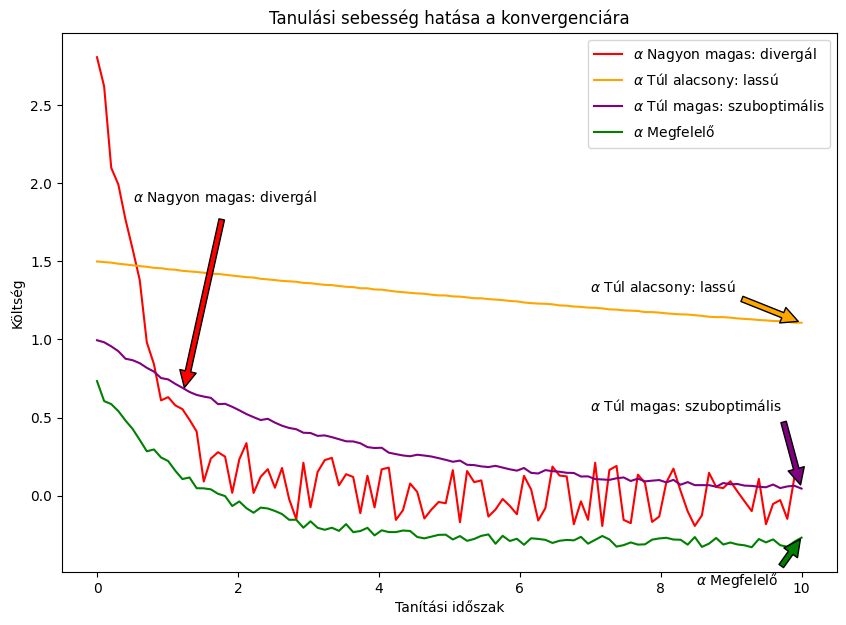

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the epochs
epochs = np.linspace(0, 10, 100)

# Simulate loss curves for different learning rates
# These are not based on actual data, just a representation for visualization
def loss_curve(epochs: np.ndarray, lr: float) -> np.ndarray:
    """Simulate a loss curve given epochs and a learning rate."""
    return np.exp(-lr * epochs) + lr * 0.1 * (np.random.rand(len(epochs)) - 0.5)

# Loss curves for different scenarios
loss_too_high = loss_curve(epochs, 1.5) * 3  # Diverges
loss_too_small = loss_curve(epochs, 0.05) + 0.5  # Converges slowly
loss_suboptimal = loss_curve(epochs, 0.3)  # Converges suboptimally
loss_just_right = loss_curve(epochs, 0.7) - 0.3  # Converges optimally
loss_perfect = np.concatenate([loss_curve(epochs[:50], 0.7), loss_curve(epochs[50:], 0.1)]) - 0.3  # Learning rate annealing

# Create the plot
#plt.figure(figsize=(15, 7.5))
plt.figure(figsize=(10, 7))
# Plot each loss curve
plt.plot(epochs, loss_too_high, color='red', label=r'$\alpha$ Nagyon magas: divergál')
plt.plot(epochs, loss_too_small, color='orange', label=r'$\alpha$ Túl alacsony: lassú')
plt.plot(epochs, loss_suboptimal, color='purple', label=r'$\alpha$ Túl magas: szuboptimális')
plt.plot(epochs, loss_just_right, color='green', label=r'$\alpha$ Megfelelő')
#plt.plot(epochs, loss_perfect, color='green', linestyle='dashed', label='Start with a high learning rate then reduce it: perfect!')

# Annotating the plot
plt.annotate(r'$\alpha$ Nagyon magas: divergál', xy=(epochs[10] + .2, loss_too_high[10]), xytext=(epochs[5], loss_too_high[5] + 0.3), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(r'$\alpha$ Túl alacsony: lassú', xy=(epochs[-1], loss_too_small[-1]), xytext=(epochs[-1] - 3, loss_too_small[-1] + 0.2), arrowprops=dict(facecolor='orange', shrink=0.05))
plt.annotate(r'$\alpha$ Túl magas: szuboptimális', xy=(epochs[-1], loss_suboptimal[-1]), xytext=(epochs[-1] - 3, loss_suboptimal[-1] + .5), arrowprops=dict(facecolor='purple', shrink=0.05))
plt.annotate(r'$\alpha$ Megfelelő', xy=(epochs[-1], loss_just_right[-1]), xytext=(epochs[-1] - 1.5, loss_just_right[-1] - .3), arrowprops=dict(facecolor='green', shrink=0.05))
#plt.annotate('Start with a high learning rate then reduce it: perfect!', xy=(epochs[50], loss_perfect[50]), xytext=(epochs[25], loss_perfect[25] - 0.4), arrowprops=dict(facecolor='green', shrink=0.05))

# Labels and title
plt.xlabel('Tanítási időszak')
plt.ylabel('Költség')
plt.title('Tanulási sebesség hatása a konvergenciára')
plt.legend()

# Show the plot
save_fig('neural_7')
plt.show()


Saving figure neural_14


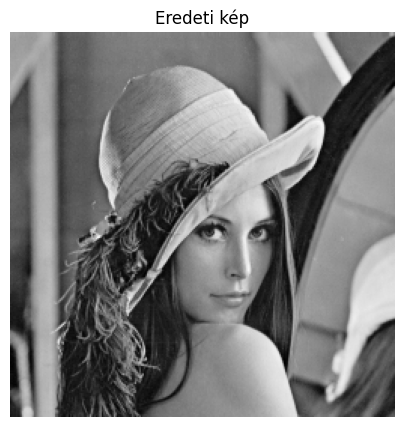

Saving figure neural_15


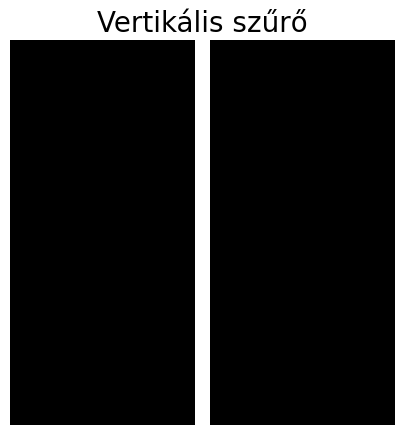

Saving figure neural_16


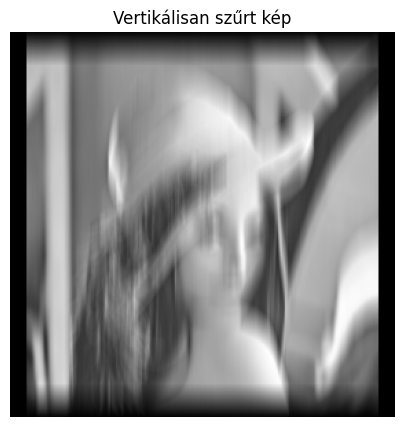

Saving figure neural_17


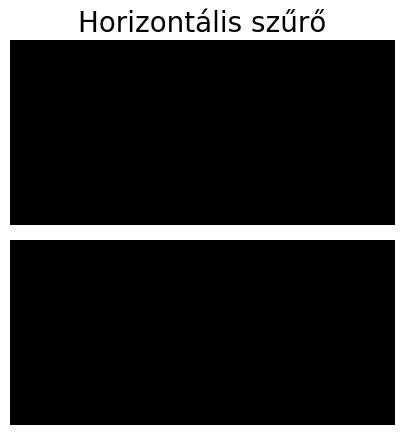

Saving figure neural_18


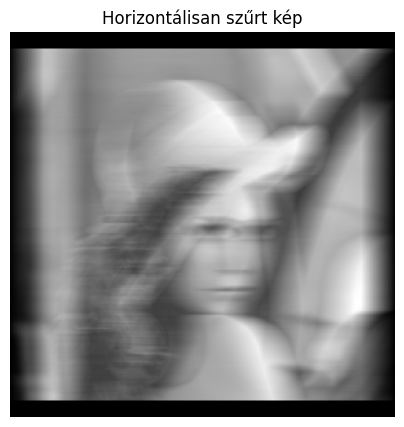

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

image = cv2.imread('./Lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

resize_ratio = .5
image = cv2.resize(image, (int(image.shape[0] * resize_ratio), int(image.shape[1] * resize_ratio)))

filter_size = 25
assert filter_size % 2 == 1, 'Filter size must be odd'

vertical_filter = np.zeros((filter_size, filter_size))
vertical_filter[:, int(np.floor(filter_size / 2))] = np.ones(filter_size)

horizontal_filter = np.zeros((filter_size, filter_size))
horizontal_filter[int(np.floor(filter_size / 2)), :] = np.ones(filter_size)



# Apply filters to the generated image
vertical_filtered = convolve2d(image, vertical_filter)
horizontal_filtered = convolve2d(image, horizontal_filter)

# Plotting the original and filtered images
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Eredeti kép")
plt.axis('off')
save_fig('neural_14')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(vertical_filter, cmap='gray')
plt.title("Vertikális szűrő", size=20)
plt.axis('off')
save_fig('neural_15')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(vertical_filtered, cmap='gray')
plt.title("Vertikálisan szűrt kép")
plt.axis('off')
save_fig('neural_16')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(horizontal_filter, cmap='gray')
plt.title("Horizontális szűrő", size=20)
plt.axis('off')
save_fig('neural_17')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(horizontal_filtered, cmap='gray')
plt.title("Horizontálisan szűrt kép")
plt.axis('off')
save_fig('neural_18')
plt.show()

Saving figure neural_20


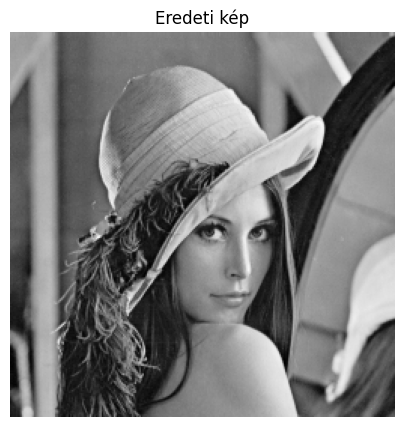

Saving figure neural_21


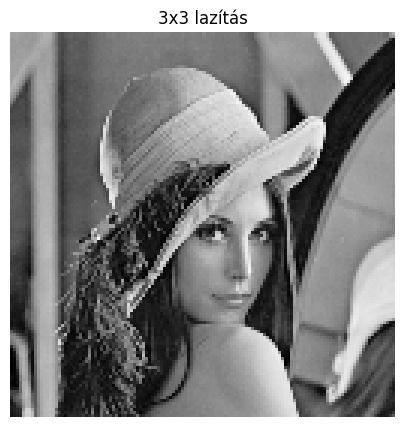

Saving figure neural_22


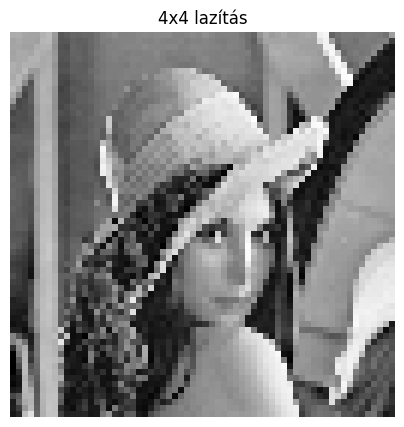

Saving figure neural_23


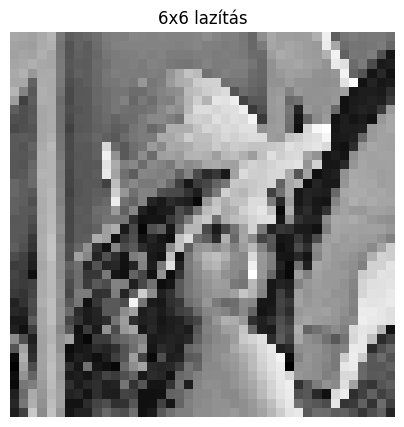

In [35]:
# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Eredeti kép')
save_fig('neural_20')
plt.show()

pool_size = (2, 2)
pooled_image = cv2.resize(image, (image.shape[1] // pool_size[0], image.shape[0] // pool_size[1]), interpolation=cv2.INTER_NEAREST)

# Display the pooled image
plt.figure(figsize=(5, 5))
plt.imshow(pooled_image, cmap='gray')
plt.axis('off')
plt.title('3x3 lazítás')
save_fig('neural_21')
plt.show()

pool_size = (4, 4)
pooled_image = cv2.resize(image, (image.shape[1] // pool_size[0], image.shape[0] // pool_size[1]), interpolation=cv2.INTER_NEAREST)

# Display the pooled image
plt.figure(figsize=(5, 5))
plt.imshow(pooled_image, cmap='gray')
plt.axis('off')
plt.title('4x4 lazítás')
save_fig('neural_22')
plt.show()

pool_size = (6, 6)
pooled_image = cv2.resize(image, (image.shape[1] // pool_size[0], image.shape[0] // pool_size[1]), interpolation=cv2.INTER_NEAREST)

# Display the pooled image
plt.figure(figsize=(5, 5))
plt.imshow(pooled_image, cmap='gray')
plt.axis('off')
plt.title('6x6 lazítás')
save_fig('neural_23')
plt.show()

Saving figure neural_24


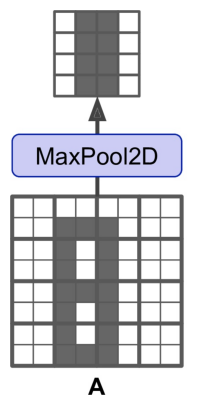

Saving figure neural_25


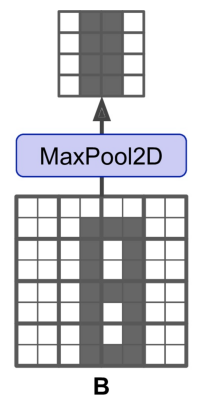

Saving figure neural_26


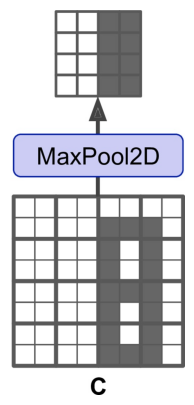

In [41]:
# Load your image
image = cv2.imread('maxpool2d.jpg')

# Get the height and width of the image
height, width, _ = image.shape

# Function to find the left and right cropping indices
def find_crop_indices(slice_image):
    # Convert the slice to grayscale
    gray_slice = cv2.cvtColor(slice_image, cv2.COLOR_BGR2GRAY)
    
    # Find the leftmost non-white column
    left_crop_index = next((i for i, col in enumerate(gray_slice.T) if not np.all(col == 255)), 0)
    
    # Find the rightmost non-white column (reverse order)
    right_crop_index = width - next((i for i, col in enumerate(gray_slice.T[::-1]) if not np.all(col == 255)), 0)
    
    return left_crop_index, right_crop_index

# Calculate the x-axis slice positions
slice1_start = 0
slice1_end = width // 3
slice2_start = width // 3
slice2_end = (2 * width) // 3
slice3_start = (2 * width) // 3
slice3_end = width

# Slice the image into three equal parts along the x-axis
slice1 = image[:, slice1_start:slice1_end]
slice2 = image[:, slice2_start:slice2_end]
slice3 = image[:, slice3_start:slice3_end]

# Find the left and right cropping indices for each slice
left_crop1, right_crop1 = find_crop_indices(slice1)
left_crop2, right_crop2 = find_crop_indices(slice2)
left_crop3, right_crop3 = find_crop_indices(slice3)

# Crop the slices based on the cropping indices
slice1_cropped = slice1[:, left_crop1:right_crop1]
slice2_cropped = slice2[:, left_crop2:right_crop2]
slice3_cropped = slice3[:, left_crop3:right_crop3]

fs = (5, 5)

plt.figure(figsize=fs)
plt.imshow(slice1_cropped)
plt.axis('off')
save_fig('neural_24')
plt.show()

plt.figure(figsize=fs)
plt.imshow(slice2_cropped)
plt.axis('off')
save_fig('neural_25')
plt.show()

plt.figure(figsize=fs)
plt.imshow(slice3_cropped)
plt.axis('off')
save_fig('neural_26')
plt.show()